<a href="https://colab.research.google.com/github/iamsandeepadapa/FIRST-PROJECT/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [ ]:
df.shape

(150, 5)

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
145,False
146,False
147,False
148,False


In [ ]:
df.duplicated().sum()

3

In [ ]:
null_values = df.isna().sum()
null_values

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
print(df.groupby(['species']).count())

In [ ]:
df.shape

In [ ]:
species_mode = df['species'].mode()
print(f'Mode of Species :{species_mode}')

Mode of Species :0    Iris-versicolor
Name: species, dtype: object


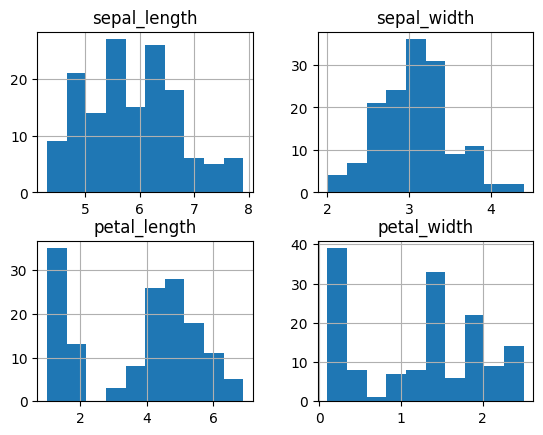

In [ ]:
df.hist()
plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
plt.figure(figsize=(15, 10))

# Loop through the features and create a plot for each
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df, x=feature, hue='species', kde=True, palette='bright', multiple='stack')
    plt.title(f'Distribution of {feature.replace("_", " ").title()} by Species')

plt.show()


In [ ]:
species = df['species'].value_counts()

plt.figure(figsize = (5,4))
plt.bar(species.index, species.values, color = 'pink')
plt.title('distribution of species')
plt.show()

In [ ]:
plt.figure(figsize=(4, 3))
sns.boxplot(x='species', y='sepal_length', data=df)
plt.title('Sepal Length Distribution by Species')
plt.show()

In [ ]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='species',y= 'sepal_width',data=df)

In [ ]:
corr_matrix = df.drop(columns=['species']).corr()
corr_matrix

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True, cmap='pink', square=True, linewidths=1)
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['species'] = le.fit_transform(df['species'])

In [ ]:
X = df.drop('species', axis=1)
y = df['species']

In [ ]:
X.head()

In [ ]:
y.value_counts(normalize=True) * 100

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
lr = LogisticRegression(C = 100, max_iter=1000)
lr.fit(X_train , y_train)
lr_score = lr.score(X_test , y_test)
print(lr_score * 100)

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train , y_train)
dtc_score = dtc.score(X_test , y_test)
print(dtc_score * 100)

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train , y_train)
rfc_score = rfc.score(X_test , y_test)
print(rfc_score * 100)

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train , y_train)
gnb_score = gnb.score(X_test , y_test)
print(gnb_score * 100)

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
svc_score = svc.score(X_test, y_test)
print(svc_score * 100)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)
print(knn_score * 100)

In [ ]:
model_evaluation = {}
models = [lr,dtc,rfc, gnb, knn, svc]
model_results = {}

for model in models:
    model_results[str(model).split("(")[0]] = [model.predict(X_test)]

print(model_results)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [ ]:
for model, preds in model_results.items():
    model_evaluation[model] = [
                            round(accuracy_score(y_test, pd.DataFrame(preds).T) * 100, 2),
                            round(f1_score(y_test, pd.DataFrame(preds).T, average='macro') * 100, 2),
                            round(precision_score(y_test, pd.DataFrame(preds).T, average='macro') * 100, 2),
                            round(recall_score(y_test, pd.DataFrame(preds).T, average='macro') * 100, 2),
    ]

In [ ]:
print(model_evaluation)

In [ ]:
results_df = pd.DataFrame(model_evaluation, index=["Accuracy", "F-1 Score", "Precision Score", "Recall Score"])
results_df.style.background_gradient(axis=None, cmap='pink')

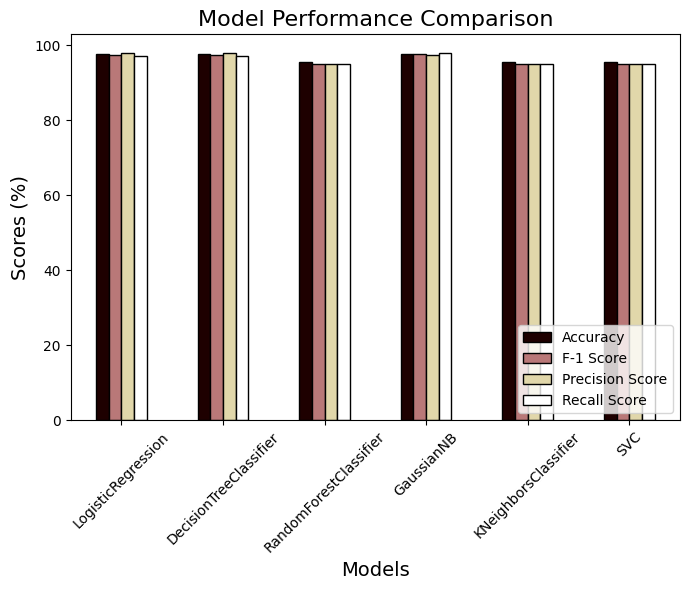

In [ ]:
results_df_transposed = results_df.T


results_df_transposed.plot(kind='bar', figsize=(7, 6), cmap='pink', edgecolor='black')

plt.title('Model Performance Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Scores (%)', fontsize=14)

plt.xticks(rotation=45)

plt.legend(loc='lower right')
plt.tight_layout()
plt.show()